# HomeWork 1 Question 3

In [135]:
# Import our libraries
import numpy as np
import matplotlib.pyplot as plt

## (PART A) Create the Training Dataset

In [136]:
# uniformly spaced input values xn
training_set = np.linspace(0, 1, 10)

print("training set input values: \n", training_set)

training set input values: 
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [137]:
# Create the target dataset 
sine = []
target_set = []

# populate the target set (adding a gaussian distribution to sin(2pi(x))) 
for num in training_set:
    # model
    sine.append(np.sin(2*np.pi*num))
    # gaussian noise: mean 0 and variance 2 (sqrt of standard deviation)
    random_noise =  np.random.normal(loc = 0, scale = np.sqrt(0.2))
    print("Random Noise: ", random_noise)
    target_set.append(np.sin(2*np.pi*num) + random_noise)
    
print("\n Model: \n ", sine)
print("\nTarget set: \n", target_set)

Random Noise:  -0.24398253808017245
Random Noise:  0.4812171258324996
Random Noise:  0.4246546070177818
Random Noise:  0.23999538356500016
Random Noise:  0.10123630761874516
Random Noise:  -0.4845623914688236
Random Noise:  0.10908118282584425
Random Noise:  -0.08094467987680103
Random Noise:  -0.26995627703491404
Random Noise:  -0.12065973255229426

 Model: 
  [0.0, 0.6427876096865393, 0.984807753012208, 0.8660254037844387, 0.3420201433256689, -0.34202014332566866, -0.8660254037844385, -0.9848077530122081, -0.6427876096865396, -2.4492935982947064e-16]

Target set: 
 [-0.24398253808017245, 1.1240047355190388, 1.4094623600299898, 1.106020787349439, 0.443256450944414, -0.8265825347944922, -0.7569442209585943, -1.0657524328890091, -0.9127438867214537, -0.12065973255229451]


## (PART B) Curve Fitting

Polynomial form:   
-1.766 x + 0.8988


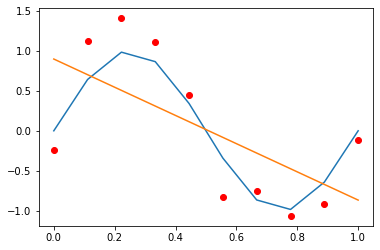

In [138]:
# Polynomial curve fitting using polyfit
# Computes optimal weights
model_1 = np.polyfit(training_set, target_set, 1)
poly_1 = np.poly1d(model_1)
print("Polynomial form: ", poly_1)

# This is an example of underfitting (not complex enough)
# Blue = Model
# Red = Training Data
# Orange = Learned Model
plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_1(training_set))

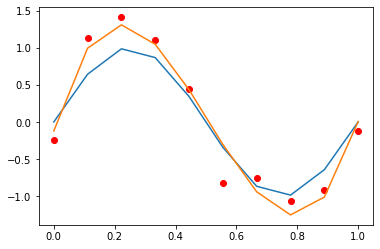

In [139]:
# plotting a model with complexity M = 3
model_3 = np.polyfit(training_set, target_set, 3)
poly_3 = np.poly1d(model_3)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_3(training_set))

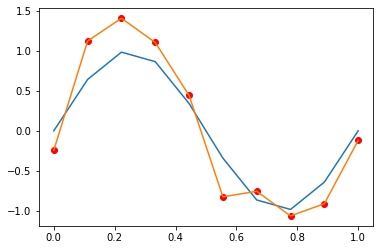

In [140]:
# plotting a model with complexity M = 9
model_9 = np.polyfit(training_set, target_set, 9)
poly_9 = np.poly1d(model_9)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_9(training_set))

If the complexity of the model is too low, it will underfit, meaning that the model will not be accurate on the given training and will not generalize well either. If the complexity of the model is too high, it will overfit, meaning that the model will be extremely accurate on the training data, but will not generalize will to other data sets.  

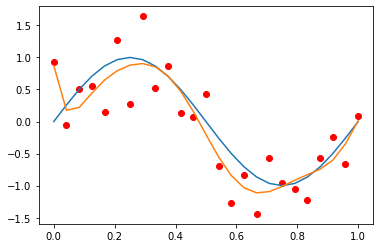

In [141]:
# Now to test complexity M = 9 with varying data set sizes
# N = 25
training_set = np.linspace(0, 1, 25)

sine = []
target_set = []

for num in training_set:
    sine.append(np.sin(2*np.pi*num))
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
model = np.polyfit(training_set, target_set, 9)
poly = np.poly1d(model)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly(training_set))

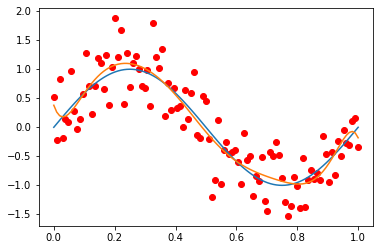

In [142]:
# N = 105
training_set = np.linspace(0, 1, 105)

sine = []
target_set = []

# populate the sine graph for visualization 
# populate the target set (adding a gaussian distribution to sin(2pi(x))) 
for num in training_set:
    sine.append(np.sin(2*np.pi*num))
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
model = np.polyfit(training_set, target_set, 9)
poly = np.poly1d(model)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly(training_set))

The problem of overfitting goes away with the increase in training set size. As the training set increases, the model overfits less (will generalize better). 

## (PART C) Model Selection 


RMS training results:
[0.9508437421820424, 0.8430973109478919, 0.8359261945919991, 0.4387820695217305, 0.43681654069892994, 0.42023871211498687, 0.33179306263766734, 0.21883110680354115, 0.12037561541203676, 1.7951381596042407e-10]
RMS testing results:
[0.684826329716782, 1.039236791700265, 1.0168503857775313, 1.3405858436297773, 1.3433407682927951, 1.3474223875386753, 1.3785274521991415, 1.3913528555738914, 1.3802444076255296, 1.3805799980017304]


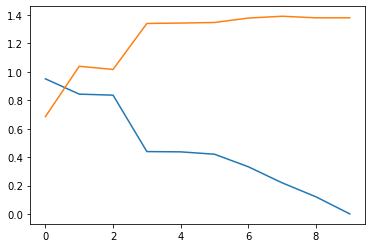

In [143]:
# Will hold RMS results for each complexity 
RMS_training_plot = []
RMS_testing_plot = []

N = 10
input_set_training = np.linspace(0, 1, N)
# New indpendent test set to compute RMS error on 
input_set_testing = np.linspace(1.5, 2.5, N)

# target sets for our training and testing data
target_set_training = []
target_set_testing = []

complexity = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Populating our training set targets
for num in input_set_training:
    target_set_training.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))

# Populating our testing set targets using the same model
for num in input_set_testing:
    target_set_testing.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
#print("\nTraining targets: ", target_set_training)    
#print("\nTesting targets: ", target_set_testing)      
    
for M in complexity:
    #print("\nCalculating for Complexity: ", M)
    
    # find weights for current complexity with polyfit
    weights_tr = np.polyfit(input_set_training, target_set_training, M)
    poly_tr = np.poly1d(weights_tr)
    #print("\nOptimal training weights: ", poly_tr)
    
    # y(xn, w*) prediction for our current complexity 
    predictions_tr = poly_tr(input_set_training)
    #print("\nPredictions for training set:")
    #print(predictions_tr)
    
    # Will hold result for (y(xn, w*) - tn)^2
    accuracy_tr = []
    accuracy_t = []
    
    # Summation from 1 to N
    for i in range(1, N+1):
        # finding the difference for every true value 
        #print(f"\ndifference for point ({i}), complexity ({M}): ", (predictions_tr[i-1] - target_set_training[i-1]))
        temp_tr = np.square(predictions_tr[i-1] - target_set_training[i-1])
        #print(f"\nsquared difference for point ({i}), complexity ({M}): ")
        #print(temp_tr)
        
        #print(f"\ndifference for point ({i}), complexity ({M}): ", (predictions_tr[i-1] - target_set_testing[i-1]))
        temp_t = np.square(predictions_tr[i-1] - target_set_testing[i-1])
        #print(f"\nsquared difference for point ({i}), complexity ({M}): ")
        #print(temp_t)
        
        accuracy_tr.append(temp_tr)
        accuracy_t.append(temp_t)
        
    # Finding E(w*)
    #print("\ntraining accuracy array: ", accuracy_tr)
    optimal_error_tr = (0.5 * sum(accuracy_tr))
    #print("\ntraining E of w* for complexity: ", M)
    #print(optimal_error_tr)
    
    #print("\ntesting accuracy array: ", accuracy_t)
    optimal_error_t = (0.5 * sum(accuracy_t))
    #print("\ntesting E of w* for complexity: ", M)
    #print(optimal_error_t)
    
    RMS_training = np.sqrt((2 * optimal_error_tr)/N)
    #print("\nRMS error for training set at complexity: ", M)
    #print(RMS_training)
    RMS_training_plot.append(RMS_training)

    RMS_testing = np.sqrt((2 * optimal_error_t)/N)
    #print("\nRMS error for testing set at complexity: ", M)
    #print(RMS_testing)
    RMS_testing_plot.append(RMS_testing)

print("\nRMS training results:")
print(RMS_training_plot)

print("RMS testing results:")
print(RMS_testing_plot)

plt.plot(complexity, RMS_training_plot)
plt.plot(complexity, RMS_testing_plot)

## (Part D) Overtuning

In [144]:
N = 10
training_set = np.linspace(0, 1, N)

target_set = []

complexity = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for num in training_set:
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
for M in complexity: 
    # find weights for current complexity with polyfit
    weights = np.polyfit(training_set, target_set, M)
    print(f"Magnitube of model weights for complexity: {M}\n", abs(weights))

Magnitube of model weights for complexity: 0
 [0.18440378]
Magnitube of model weights for complexity: 1
 [1.22789587 0.79835171]
Magnitube of model weights for complexity: 2
 [1.62452293 2.8524188  1.03902178]
Magnitube of model weights for complexity: 3
 [20.38757633 28.95684157  8.75088082  0.33426605]
Magnitube of model weights for complexity: 4
 [4.15930706e+01 1.03573717e+02 8.08198061e+01 1.90207748e+01
 6.04022116e-02]
Magnitube of model weights for complexity: 5
 [1.31760252e+02 2.87807560e+02 1.83804610e+02 2.08470551e+01
 6.82409850e+00 1.94284498e-01]
Magnitube of model weights for complexity: 6
 [5.30815506e+02 1.46068627e+03 1.50242880e+03 7.42590578e+02
 1.94388773e+02 2.42700862e+01 1.28906991e-01]
Magnitube of model weights for complexity: 7
 [8.72056231e+02 3.58301231e+03 5.66651492e+03 4.38650840e+03
 1.76257904e+03 3.66390259e+02 3.46939242e+01 1.19267975e-01]
Magnitube of model weights for complexity: 8
 [2.25805131e+04 8.94499962e+04 1.43943007e+05 1.20784359e+05
 

As you can see as model size (model complexity) grows larger, the magnitude of the weights grows dramatically. 

## (Part E) Regularization

In [134]:
M = 9
N = 10
training_set = np.linspace(0, 1, N)
training_set_transpose = training_set.transpose()

# xt
xt = np.multiply(training_set, target_set)
print(xt)

# x^Tx
xTx = np.multiply(training_set_transpose, training_set)
print(xTx)

# identity matrix 
identity_matrix = np.identity(N)

# setting values for lambda
lambda_set = [np.exp(-40), np.exp(-35), np.exp(-30), np.exp(-25), np.exp(-20)]

target_set = []

for num in training_set:
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
for l in lambda_set:
    # Compute all the weights 
    weights = (xt/(xTx + np.multiply(l, identity_matrix)))
    print(f"Weights for ln(lambda) ({np.log(l)})", weights)
    

[-0.          0.12954171  0.25404442  0.22401781 -0.08635403 -0.19417009
 -0.72237645 -1.34434413 -0.31260031  0.17452229]
[0.         0.01234568 0.04938272 0.11111111 0.19753086 0.30864198
 0.44444444 0.60493827 0.79012346 1.        ]
Weights for ln(lambda) (-40.0) [[-0.         10.4928783   5.14439952  2.0161603  -0.43716729 -0.62911111
  -1.62534702 -2.22228315 -0.39563477  0.17452229]
 [        nan 10.4928783   5.14439952  2.0161603  -0.43716729 -0.62911111
  -1.62534702 -2.22228315 -0.39563477  0.17452229]
 [        nan 10.4928783   5.14439952  2.0161603  -0.43716729 -0.62911111
  -1.62534702 -2.22228315 -0.39563477  0.17452229]
 [        nan 10.4928783   5.14439952  2.0161603  -0.43716729 -0.62911111
  -1.62534702 -2.22228315 -0.39563477  0.17452229]
 [        nan 10.4928783   5.14439952  2.0161603  -0.43716729 -0.62911111
  -1.62534702 -2.22228315 -0.39563477  0.17452229]
 [        nan 10.4928783   5.14439952  2.0161603  -0.43716729 -0.62911111
  -1.62534702 -2.22228315 -0.39563

C:\Users\angel\AppData\Local\Temp\ipykernel_4396\3214658329.py:27: RuntimeWarning: invalid value encountered in true_divide
  weights = (xt/(xTx + np.multiply(l, identity_matrix)))
